In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_context('talk')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%config InlineBackend.figure_format = 'retina'
from datetime import timedelta
import datetime as dt
import scipy

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

In [2]:
url='https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/nacional_covid19.csv'
sp=pd.read_csv(url)

ES=pd.DataFrame({'date':pd.to_datetime(sp.fecha),'ICU':sp.ingresos_uci.diff(),
                 'hosp':sp.hospitalizados.diff(),'currenthosp':sp.hospitalizados,'currentICU':sp.ingresos_uci})
ES.hosp.clip(0,inplace=True)
ES.ICU.clip(0,inplace=True)
ES['hosp_avg']=ES.hosp.rolling(window=7,center=True).mean(std=2.5)

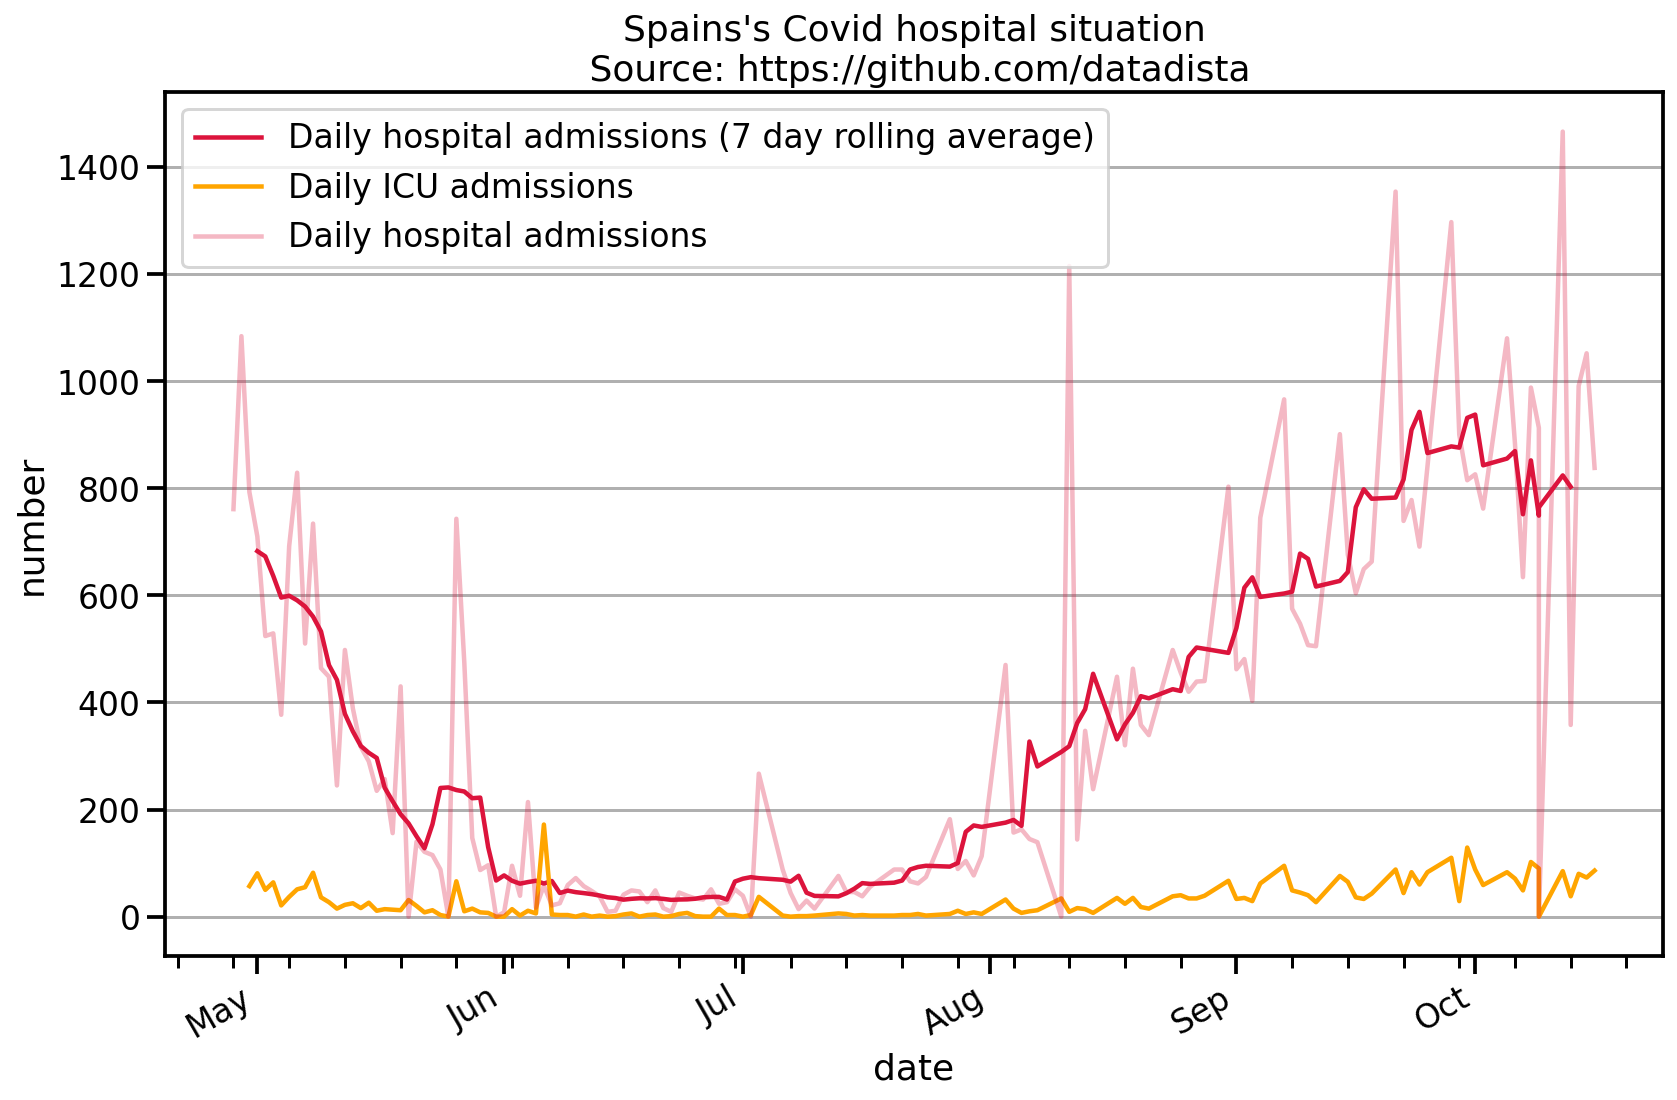

In [3]:


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 8))

ES.plot(x='date',y=['hosp_avg','ICU'],label=['Daily hospital admissions (7 day rolling average)', 'Daily ICU admissions'],ax=ax,color=['crimson','orange'])
ES.plot(x='date',y=['hosp'],label=['Daily hospital admissions'],ax=ax,color=['crimson'],alpha=0.3)


# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('number')
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()


plt.grid(axis='y')
plt.legend()

plt.title("Spains's Covid hospital situation\n Source: https://github.com/datadista")


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()
plt.savefig('plots/Spain_hospital.png',dpi=250)

In [4]:
from get_data.get_data_ecdc import get_data_ecdc_hosp
hosp=get_data_ecdc_hosp()

hosp['date']=pd.to_datetime(hosp.date)

In [5]:
FR=hosp.loc[(hosp.country=='France') & (hosp.indicator=='Weekly new hospital admissions per 100k')]
UK=hosp.loc[(hosp.country=='United Kingdom') & (hosp.indicator=='Weekly new hospital admissions per 100k')]
#IT=hosp.loc[(hosp.country=='Italy') & (hosp.indicator=='Weekly new hospital admissions per 100k')]
ES=hosp.loc[(hosp.country=='Spain') & (hosp.indicator=='Weekly new hospital admissions per 100k')]

In [6]:
hosp.loc[(hosp.country=='Italy')]

,country,indicator,date,year_week,value,source,url
4917,Italy,Daily hospital occupancy,2020-02-24,2020-W09,127.0,Country_Github,https://github.com/pcm-dpc/COVID-19
4918,Italy,Daily hospital occupancy,2020-02-25,2020-W09,149.0,Country_Github,https://github.com/pcm-dpc/COVID-19
4919,Italy,Daily hospital occupancy,2020-02-26,2020-W09,164.0,Country_Github,https://github.com/pcm-dpc/COVID-19
4920,Italy,Daily hospital occupancy,2020-02-27,2020-W09,304.0,Country_Github,https://github.com/pcm-dpc/COVID-19
4921,Italy,Daily hospital occupancy,2020-02-28,2020-W09,409.0,Country_Github,https://github.com/pcm-dpc/COVID-19
...,...,...,...,...,...,...,...
5380,Italy,Daily ICU occupancy,2020-10-10,2020-W41,390.0,Country_Github,https://github.com/pcm-dpc/COVID-19
5381,Italy,Daily ICU occupancy,2020-10-11,2020-W41,420.0,Country_Github,https://github.com/pcm-dpc/COVID-19
5382,Italy,Daily ICU occupancy,2020-10-12,2020-W42,452.0,Country_Github,https://github.com/pcm-dpc/COVID-19
5383,Italy,Daily ICU occupancy,2020-10-13,2020-W42,514.0,Country_Github,https://github.com/pcm-dpc/COVID-19


In [7]:
(hosp.loc[(hosp.country=='Italy')]).indicator.unique()

array(['Daily hospital occupancy', 'Daily ICU occupancy'], dtype=object)

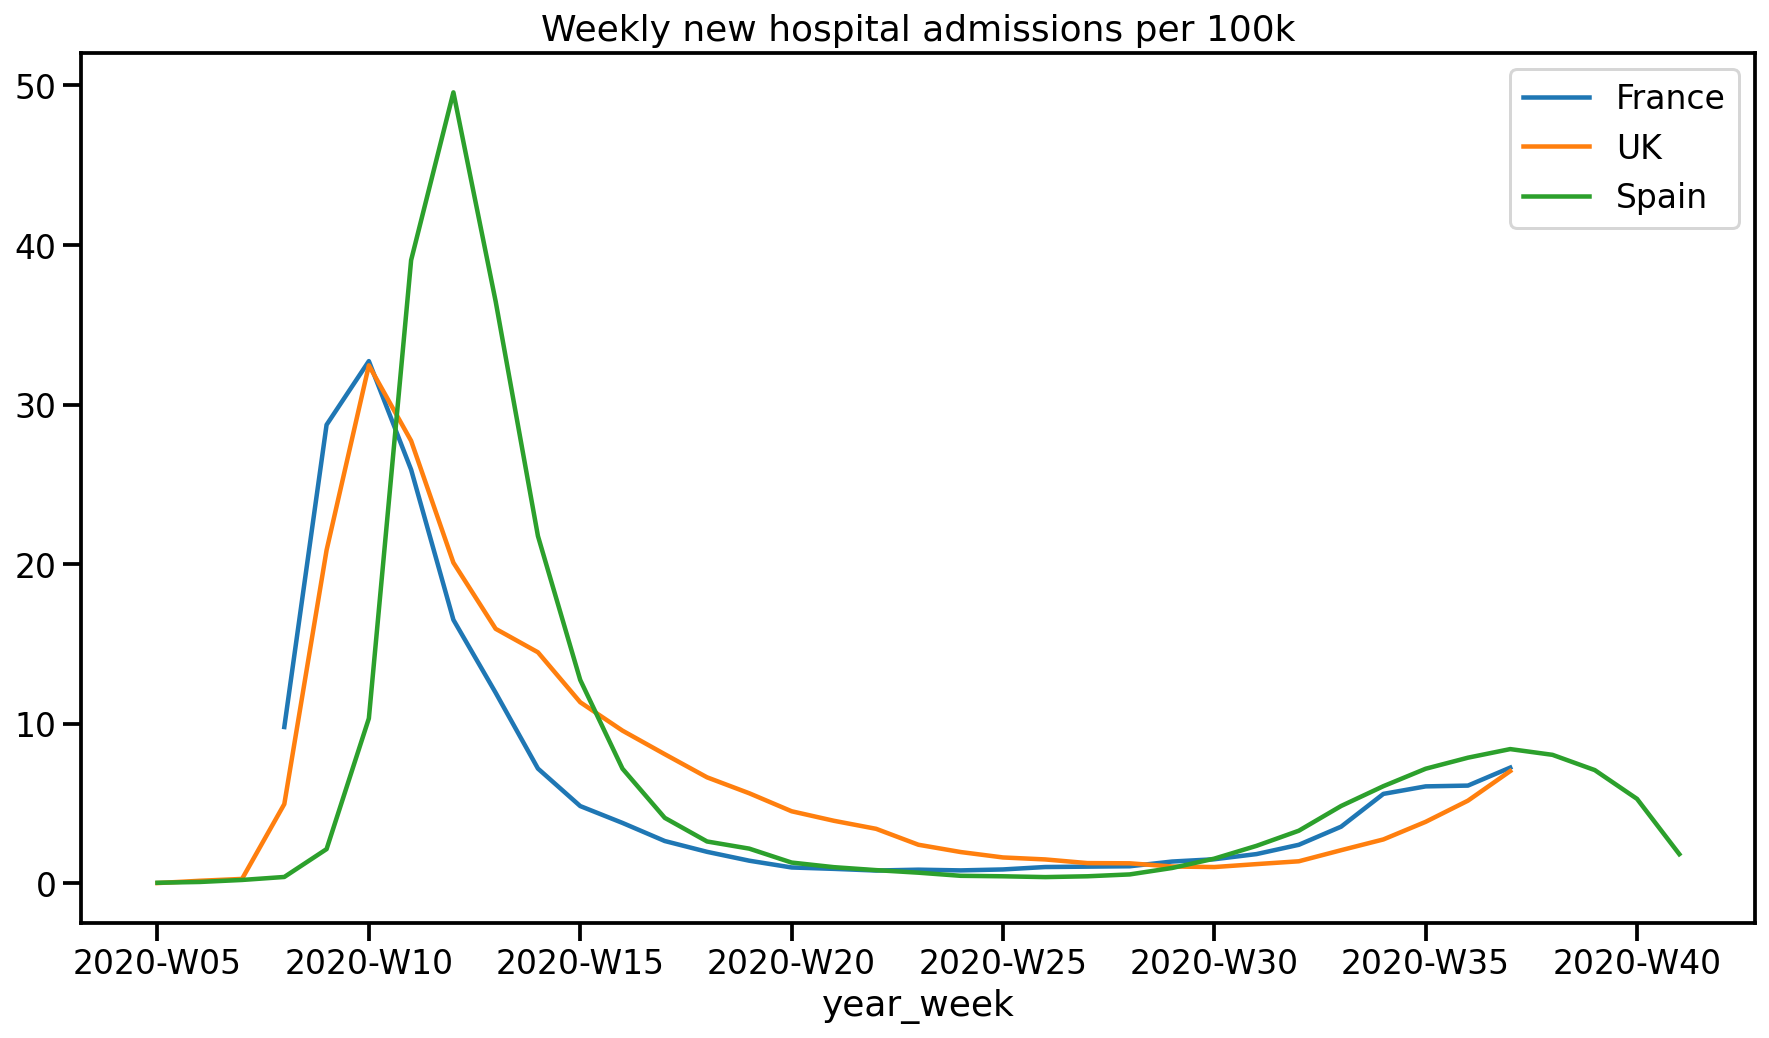

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
FR.plot(x='year_week',y='value',ax=ax,label='France')
UK.plot(x='year_week',ax=ax,y='value',label='UK')
#IT.plot(x='date',ax=ax,y='value',label='Italy')
ES.plot(x='year_week',ax=ax,y='value',label='Spain')
plt.legend()
plt.title('Weekly new hospital admissions per 100k')
fig.set_facecolor('w')
plt.savefig('plots/weekly_FR_Uk_ES.png')

In [9]:
from get_data.get_hospital_data import get_hosp_France

In [10]:
current,daily=get_hosp_France()

In [11]:
lastdate=current.date.max()
lastdate=(lastdate.date().strftime('%d %b %Y') + ' at 19:00 CET')

In [12]:
current[current.hosp==current.hosp.max()]

,jour,sexe,hosp,rea,rad,dc,date
27,2020-04-14,0,32131,6599,28804,10129,2020-04-14


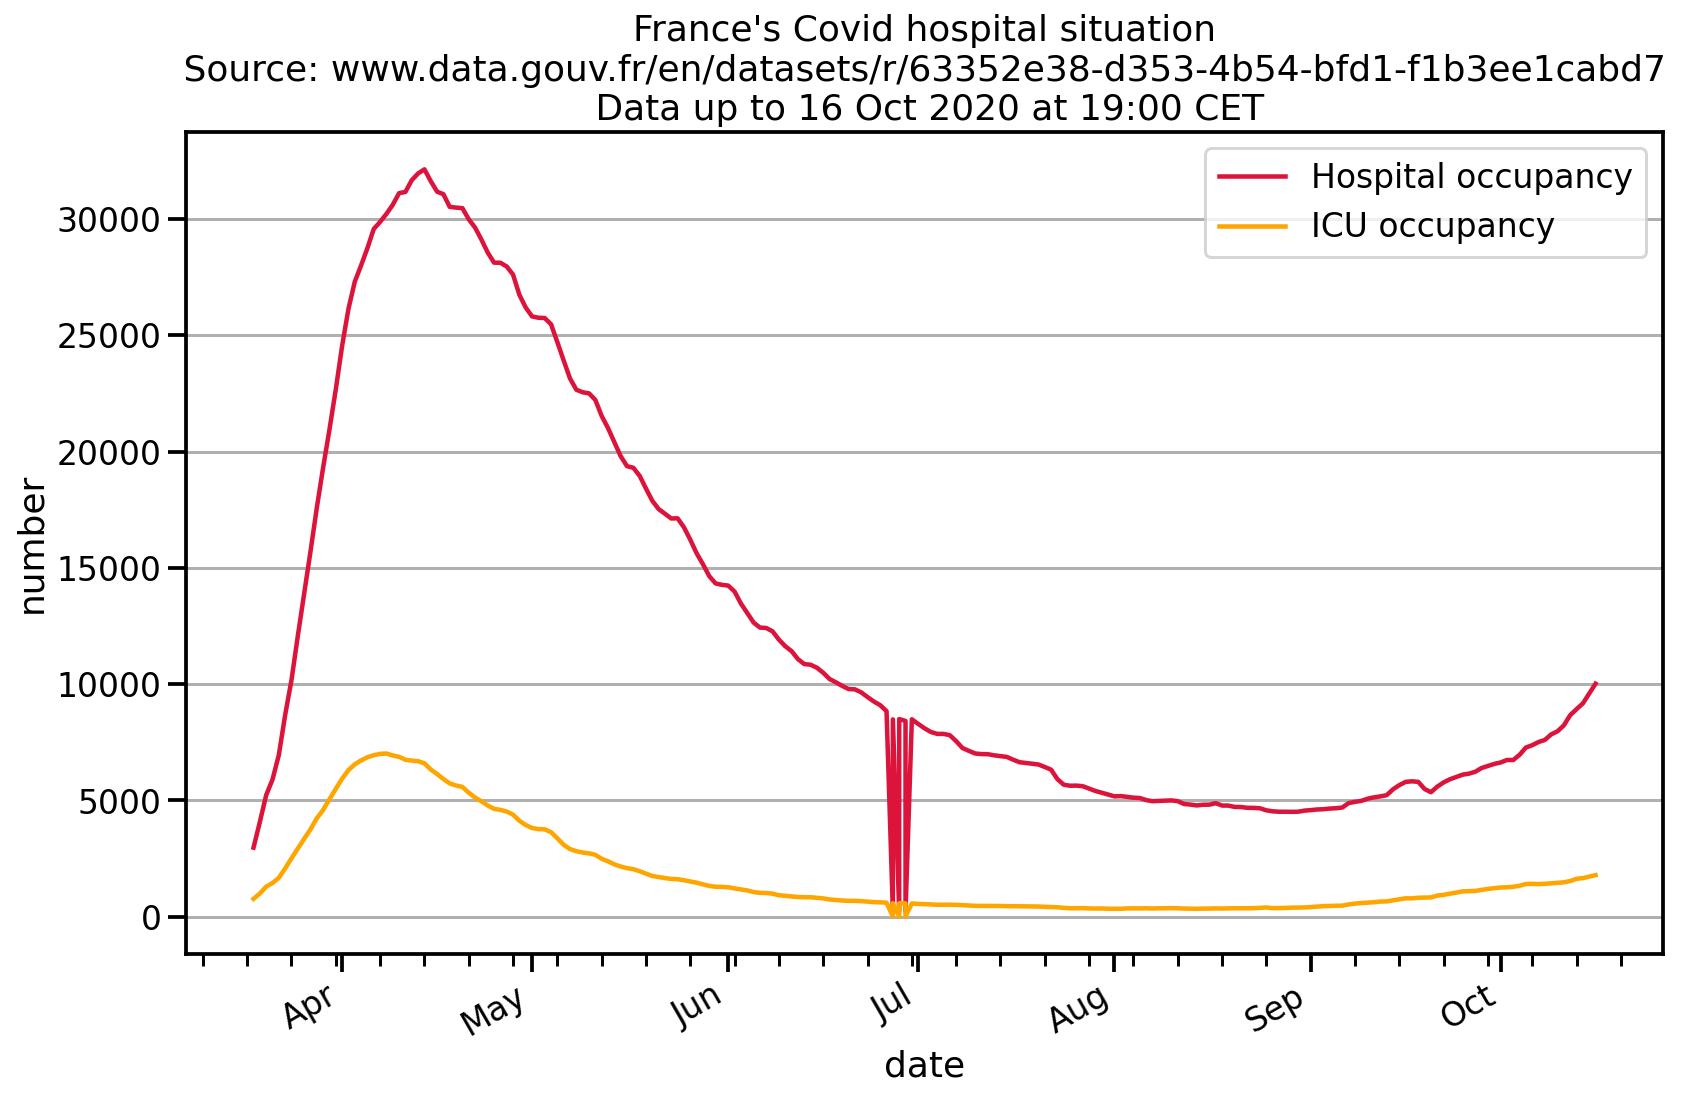

In [13]:


import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 8))

current.plot(x='date',y=['hosp','rea'],label=['Hospital occupancy','ICU occupancy'],ax=ax,color=['crimson','orange'])
#current.plot(x='date',y=['rea'],label=['Current ICU'],ax=ax,color=['orange'])


# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('number')
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()


plt.grid(axis='y')
plt.legend()

plt.title("France's Covid hospital situation\n Source: www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7 \n Data up to "+ lastdate)


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()
plt.savefig('plots/FRhospCurrent.png',dpi=250)

In [14]:

#print(list(zip(fr.incid_hosp[:-50]))


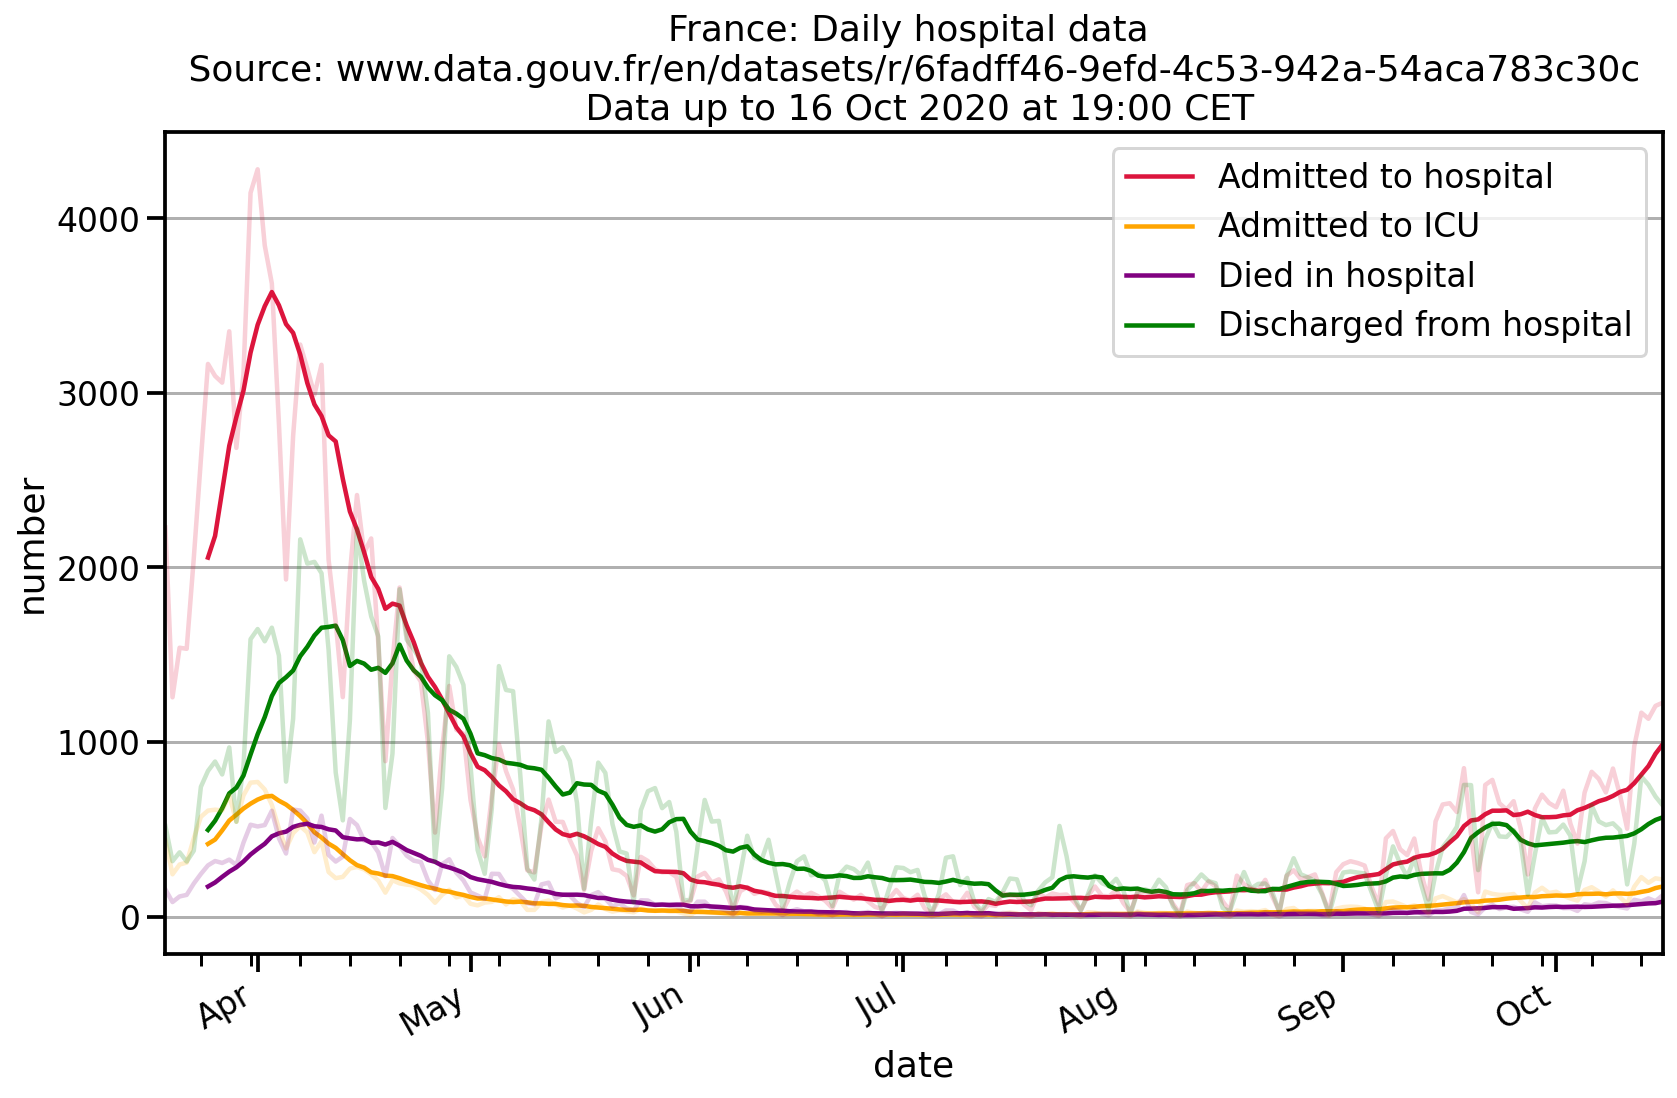

In [15]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 8))

daily.plot(x='date',y='avg_incid_hosp',color='crimson',alpha=2,ax=ax,label='Admitted to hospital',legend=True)
daily.plot(x='date',y='avg_incid_rea',color='orange',alpha=2,ax=ax,label='Admitted to ICU',legend=True)
daily.plot(x='date',y='avg_incid_dc',color='purple',alpha=2,ax=ax,label='Died in hospital',legend=True)
daily.plot(x='date',y='avg_incid_rad',color='green',alpha=2,ax=ax,label='Discharged from hospital',legend=True)


daily.plot(x='date',y=['incid_hosp','incid_rea','incid_dc','incid_rad'],ax=ax,
       color=['crimson','orange','purple','green'],alpha=0.2,legend=False)
#,label=['Admitted to hospital','Admitted to ICU','Died','Released from hospital']

plt.ylabel('number')

# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()

plt.grid(axis='y')

plt.title("France: Daily hospital data \n Source: www.data.gouv.fr/en/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c \n Data up to "+ lastdate)


fig.set_facecolor('w')

fig.autofmt_xdate()
#sns.despine;
plt.tight_layout()
plt.savefig('plots/FRhospDaily.png',dpi=250)

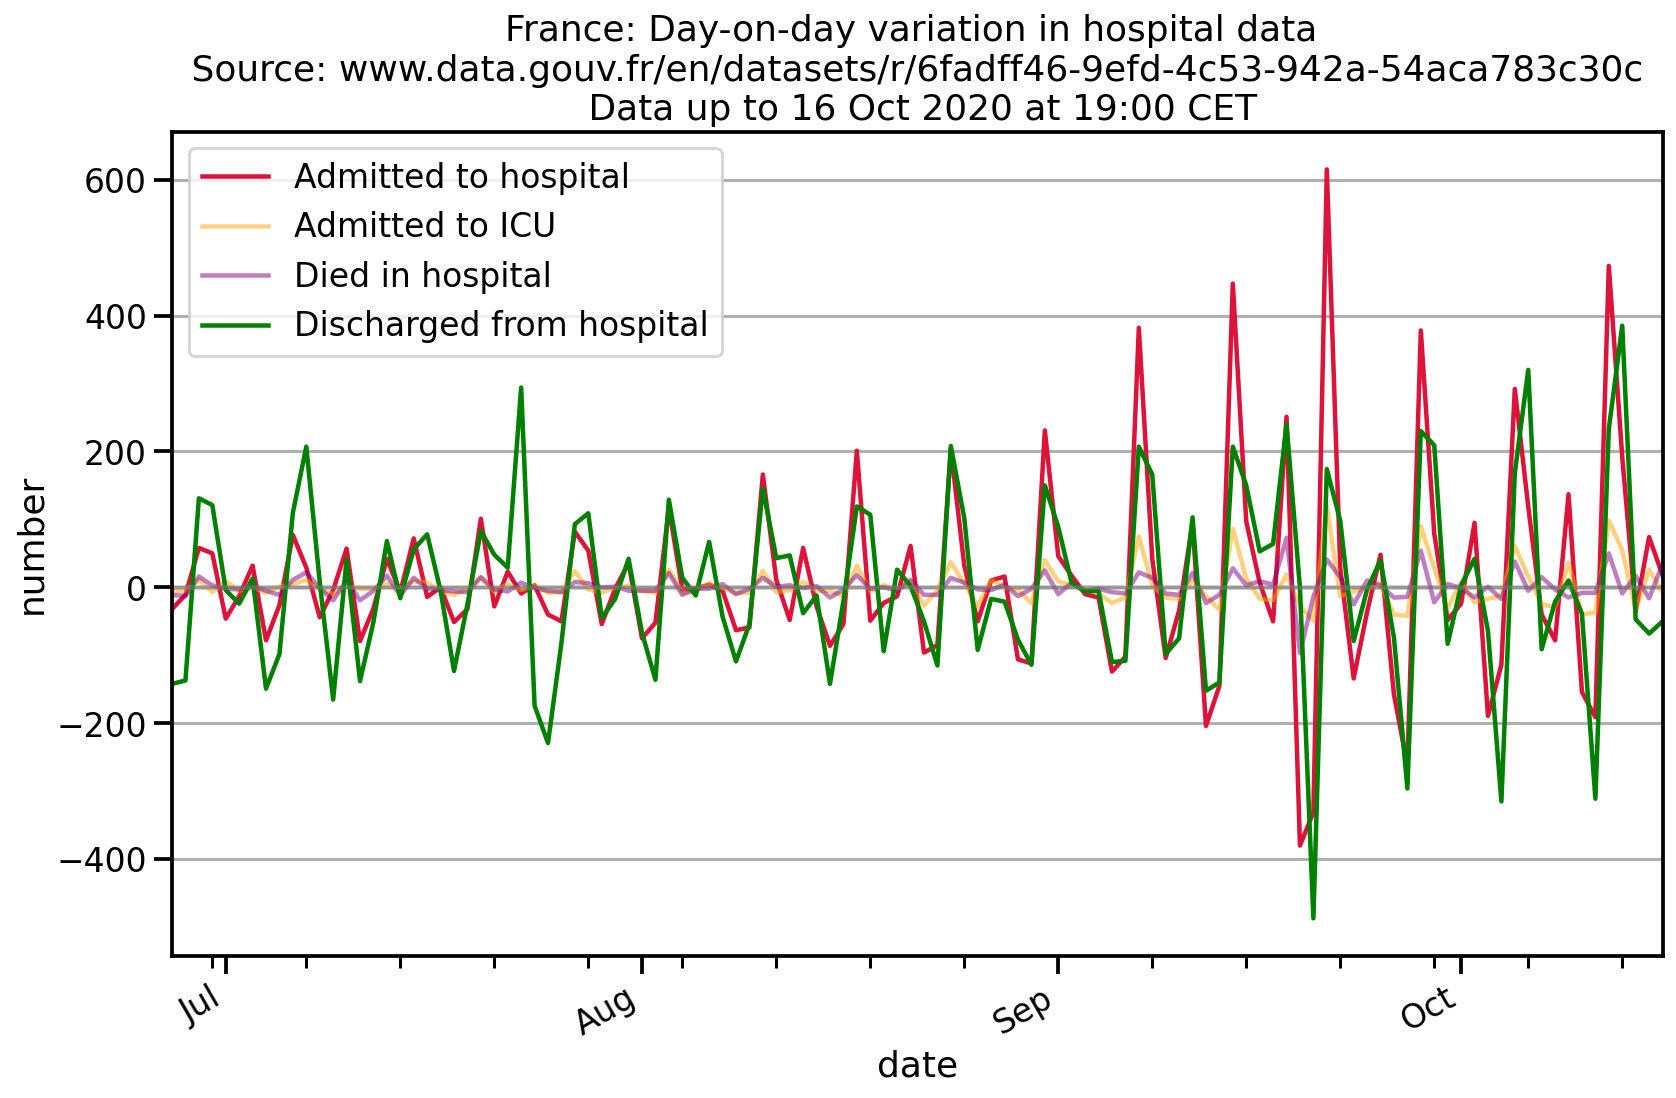

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

daily[100:].plot(x='date',y='diff_incid_hosp',color='crimson',alpha=1,ax=ax,label='Admitted to hospital',legend=True)
daily[100:].plot(x='date',y='diff_incid_rea',color='orange',alpha=0.5,ax=ax,label='Admitted to ICU',legend=True)
daily[100:].plot(x='date',y='diff_incid_dc',color='purple',alpha=0.5,ax=ax,label='Died in hospital',legend=True)
daily[100:].plot(x='date',y='diff_incid_rad',color='green',alpha=1,ax=ax,label='Discharged from hospital',legend=True)



plt.axhline(0,color='gray',alpha=0.5)


# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])
#plt.ylim=[-100000,300000]

plt.ylabel('number')


plt.title("France: Day-on-day variation in hospital data \n Source: www.data.gouv.fr/en/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c \n Data up to "+ lastdate)

plt.grid(axis='y')
fig.set_facecolor('w')

fig.autofmt_xdate()
#sns.despine;
plt.tight_layout()
plt.savefig('plots/FRhospVariation.png',dpi=250)

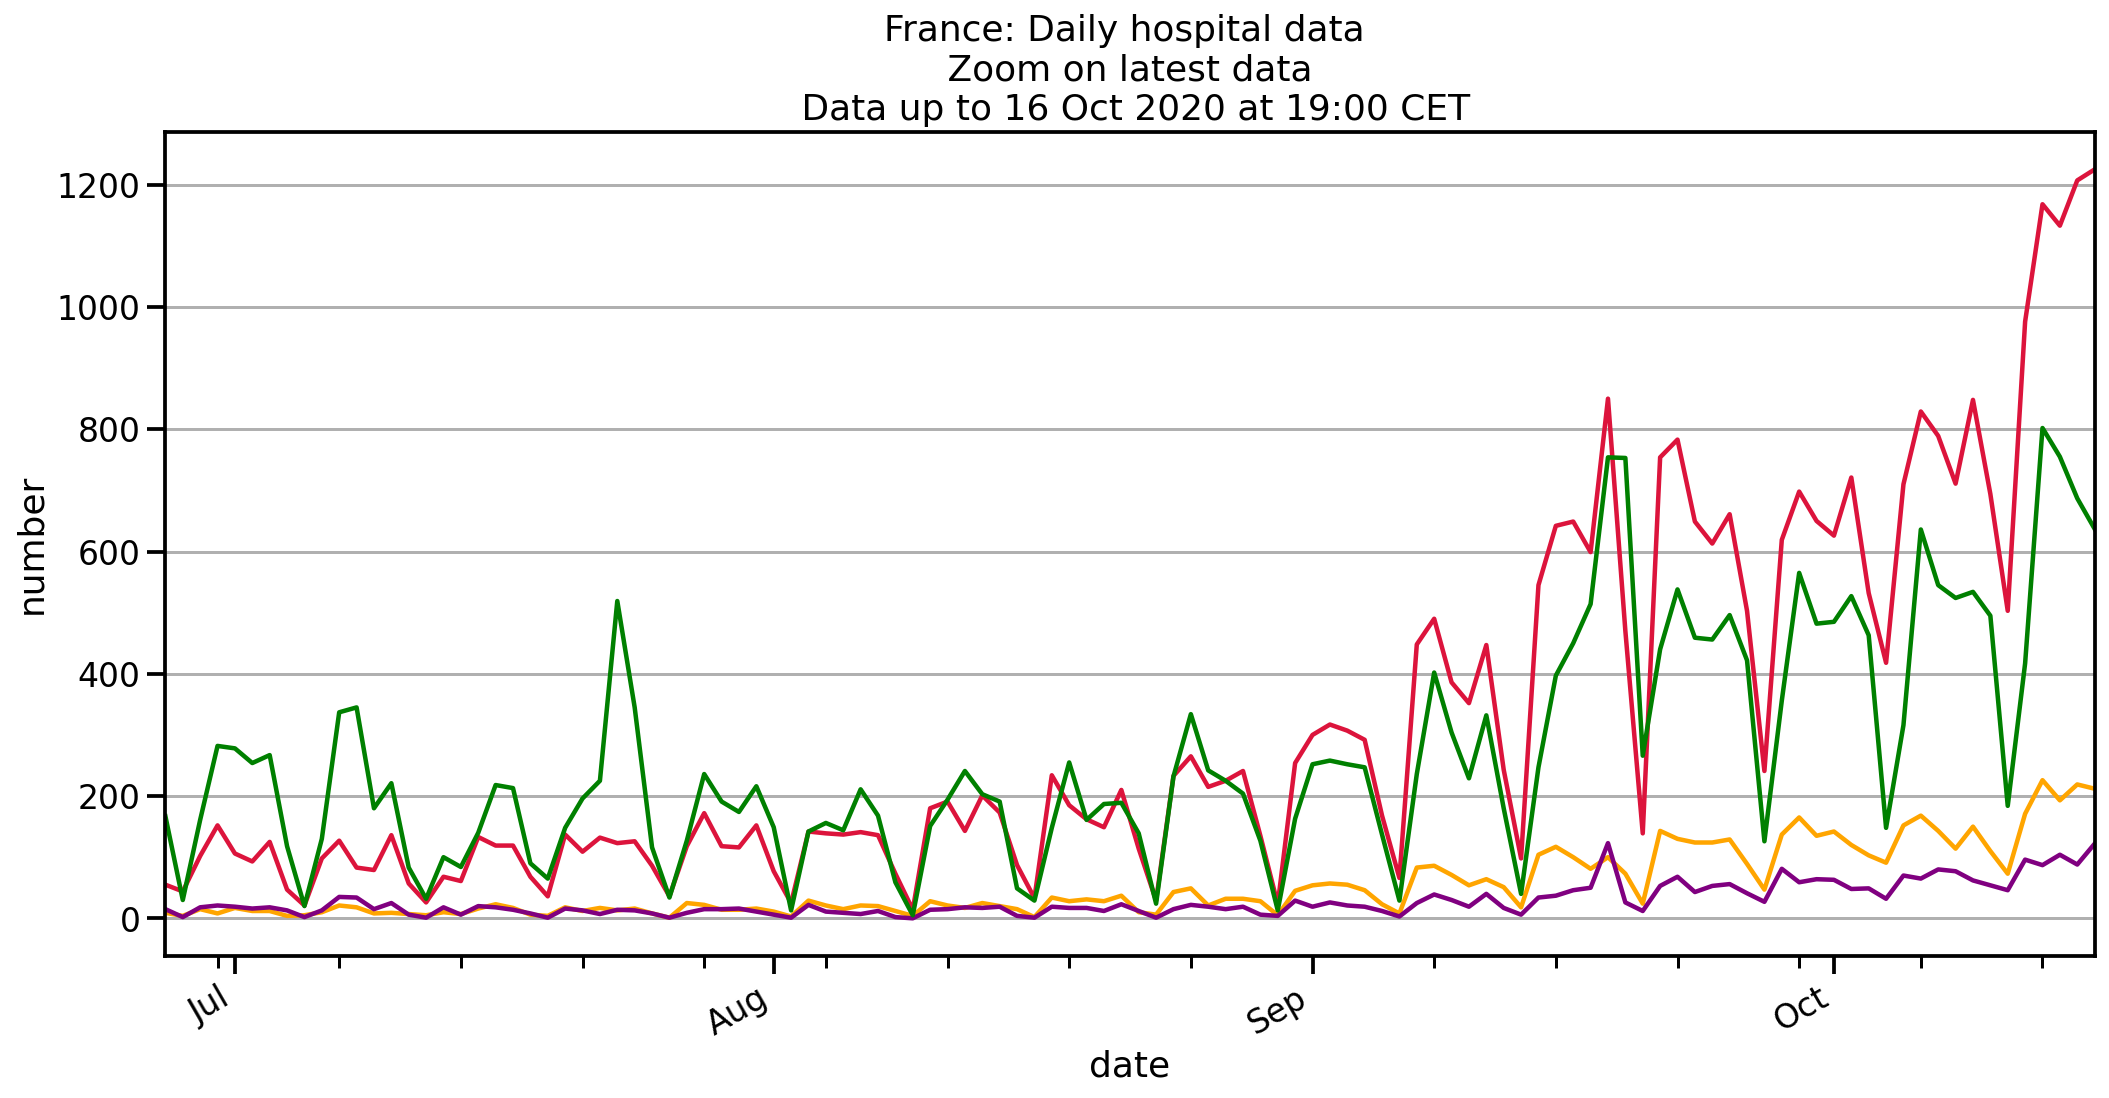

In [17]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(15, 8))

# daily[100:].plot(x='date',y='avg_incid_hosp',color='crimson',alpha=2,ax=ax,label='Admitted to hospital',legend=True)
# daily[100:].plot(x='date',y='avg_incid_rea',color='orange',alpha=2,ax=ax,label='Admitted to ICU',legend=True)
# daily[100:].plot(x='date',y='avg_incid_dc',color='purple',alpha=2,ax=ax,label='Died in hospital',legend=True)
# daily[100:].plot(x='date',y='avg_incid_rad',color='green',alpha=2,ax=ax,label='Released from hospital',legend=True)


daily[100:].plot(x='date',y=['incid_hosp','incid_rea','incid_dc','incid_rad'],ax=ax,
       color=['crimson','orange','purple','green'],alpha=1,legend=False)
#,label=['Admitted to hospital','Admitted to ICU','Died','Released from hospital']

plt.ylabel('number')

# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()

plt.grid(axis='y')

plt.title("France: Daily hospital data \n Zoom on latest data \n Data up to "+ lastdate)


fig.set_facecolor('w')

fig.autofmt_xdate()
#sns.despine;
plt.tight_layout()
plt.savefig('plots/FRhospDailyZoom.png',dpi=250)

# Marseilles

In [18]:
url='https://www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7'
fr=pd.read_csv(url,delimiter=';')
fr=fr[fr.sexe==0]
#fr=fr.groupby(by='jour',as_index=False).sum()
fr['date']=pd.to_datetime(fr.jour)
Marscurrent=fr.sort_values(by='date')
Marscurrent=Marscurrent.loc[Marscurrent.dep=='13']



url='https://www.data.gouv.fr/en/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c'
fr=pd.read_csv(url,delimiter=';')

#fr=fr.groupby(by='jour',as_index=False).sum()
fr['date']=pd.to_datetime(fr.jour)



Marsdaily=fr.sort_values(by='date')
Marsdaily=Marsdaily.loc[Marsdaily.dep=='13']

Marsdaily['avg_incid_hosp']=Marsdaily.incid_hosp.rolling(window=7).mean()
Marsdaily['avg_incid_rea']=Marsdaily.incid_rea.rolling(window=7).mean()
Marsdaily['avg_incid_dc']=Marsdaily.incid_dc.rolling(window=7).mean()
Marsdaily['avg_incid_rad']=Marsdaily.incid_rad.rolling(window=7).mean()



Marsdaily['diff_incid_hosp']=Marsdaily.incid_hosp.diff().fillna(daily.incid_hosp)
Marsdaily['diff_incid_rea']=Marsdaily.incid_rea.diff().fillna(daily.incid_rea)
Marsdaily['diff_incid_dc']=Marsdaily.incid_dc.diff().fillna(daily.incid_dc)
Marsdaily['diff_incid_rad']=Marsdaily.incid_rad.diff().fillna(daily.incid_rad)


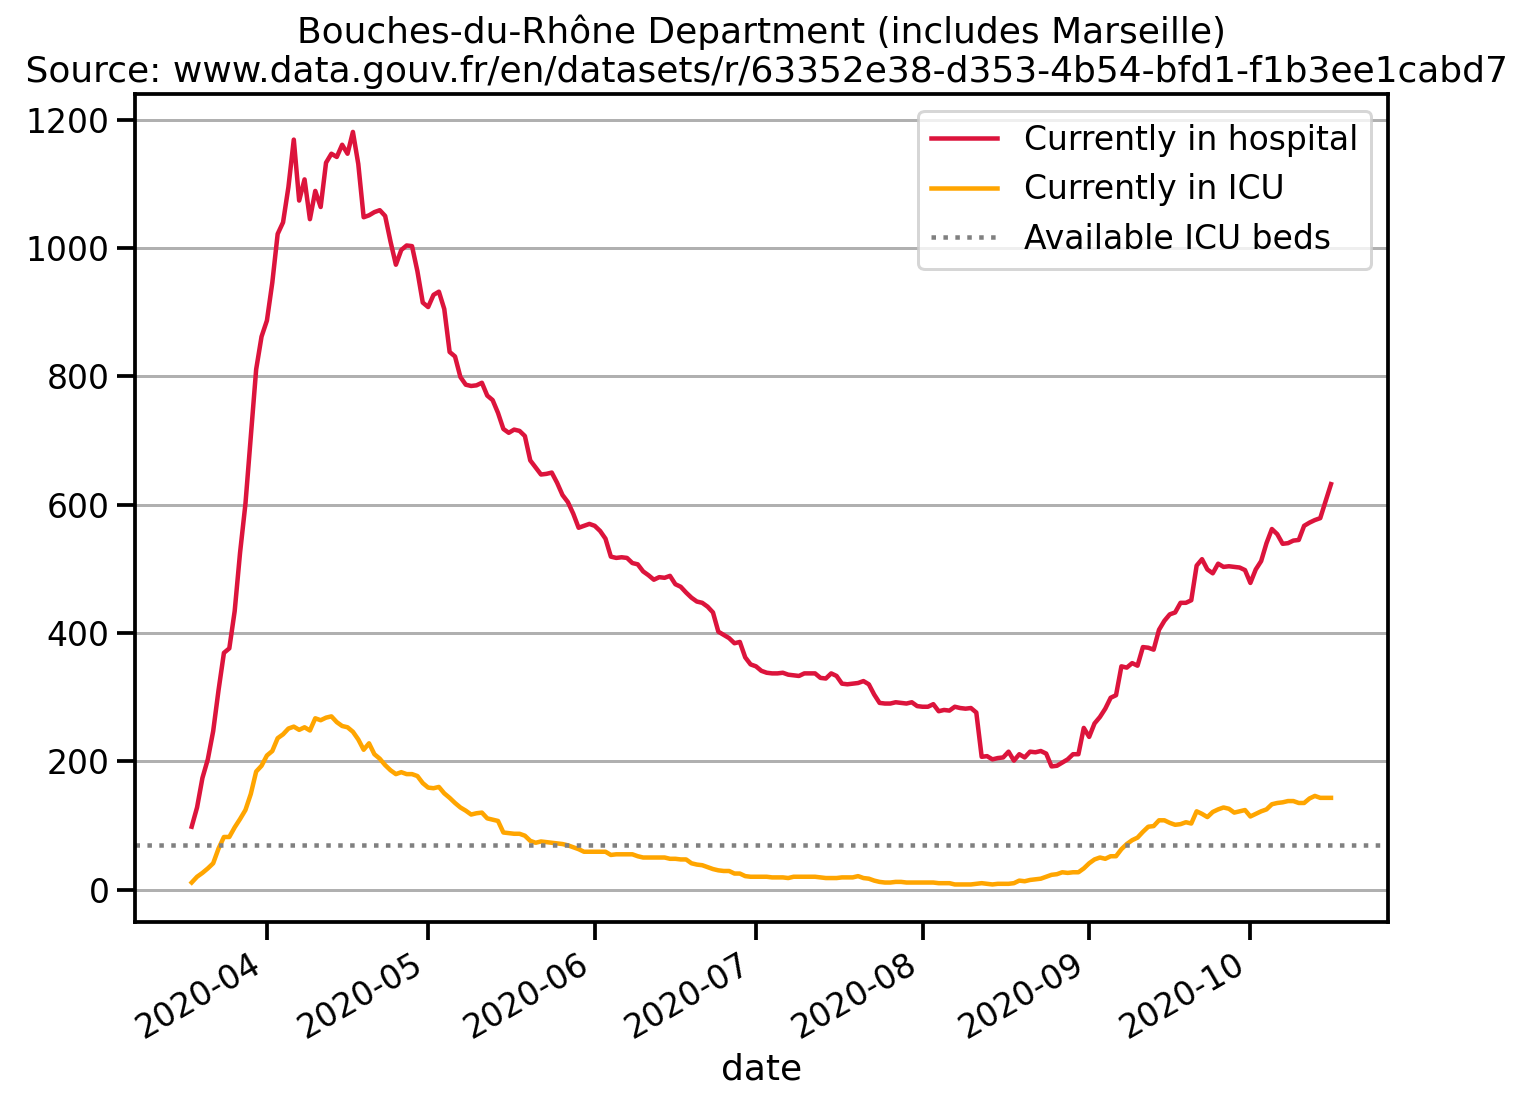

In [19]:
fig,ax=plt.subplots(figsize=(10,8))
#daily.plot(x='date',y=['incid_hosp','incid_rea','incid_dc','incid_rad'],
#        label=['Daily hospital admissions','Daily ICU admissions','Daily deaths','Daily released from hospital'],ax=ax,
 #      color=['crimson','orange','purple','green'])

Marscurrent.plot(x='date',y='hosp',label='Currently in hospital',ax=ax,color='crimson')
Marscurrent.plot(x='date',y='rea',label='Currently in ICU',ax=ax,color='orange')
plt.axhline(70,label="Available ICU beds",color='gray',linestyle=':')
#current.plot(x='date',y='dc',label='Deaths',ax=ax,color='purple')
#current.plot(x='date',y='rad',label='Cumulative released from hospital',ax=ax,color='green')
plt.title('Bouches-du-Rhône Department (includes Marseille)\n Source: www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7')
fig.set_facecolor('w')
plt.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.savefig('plots/Marseilles_current_all.png',dpi=250)

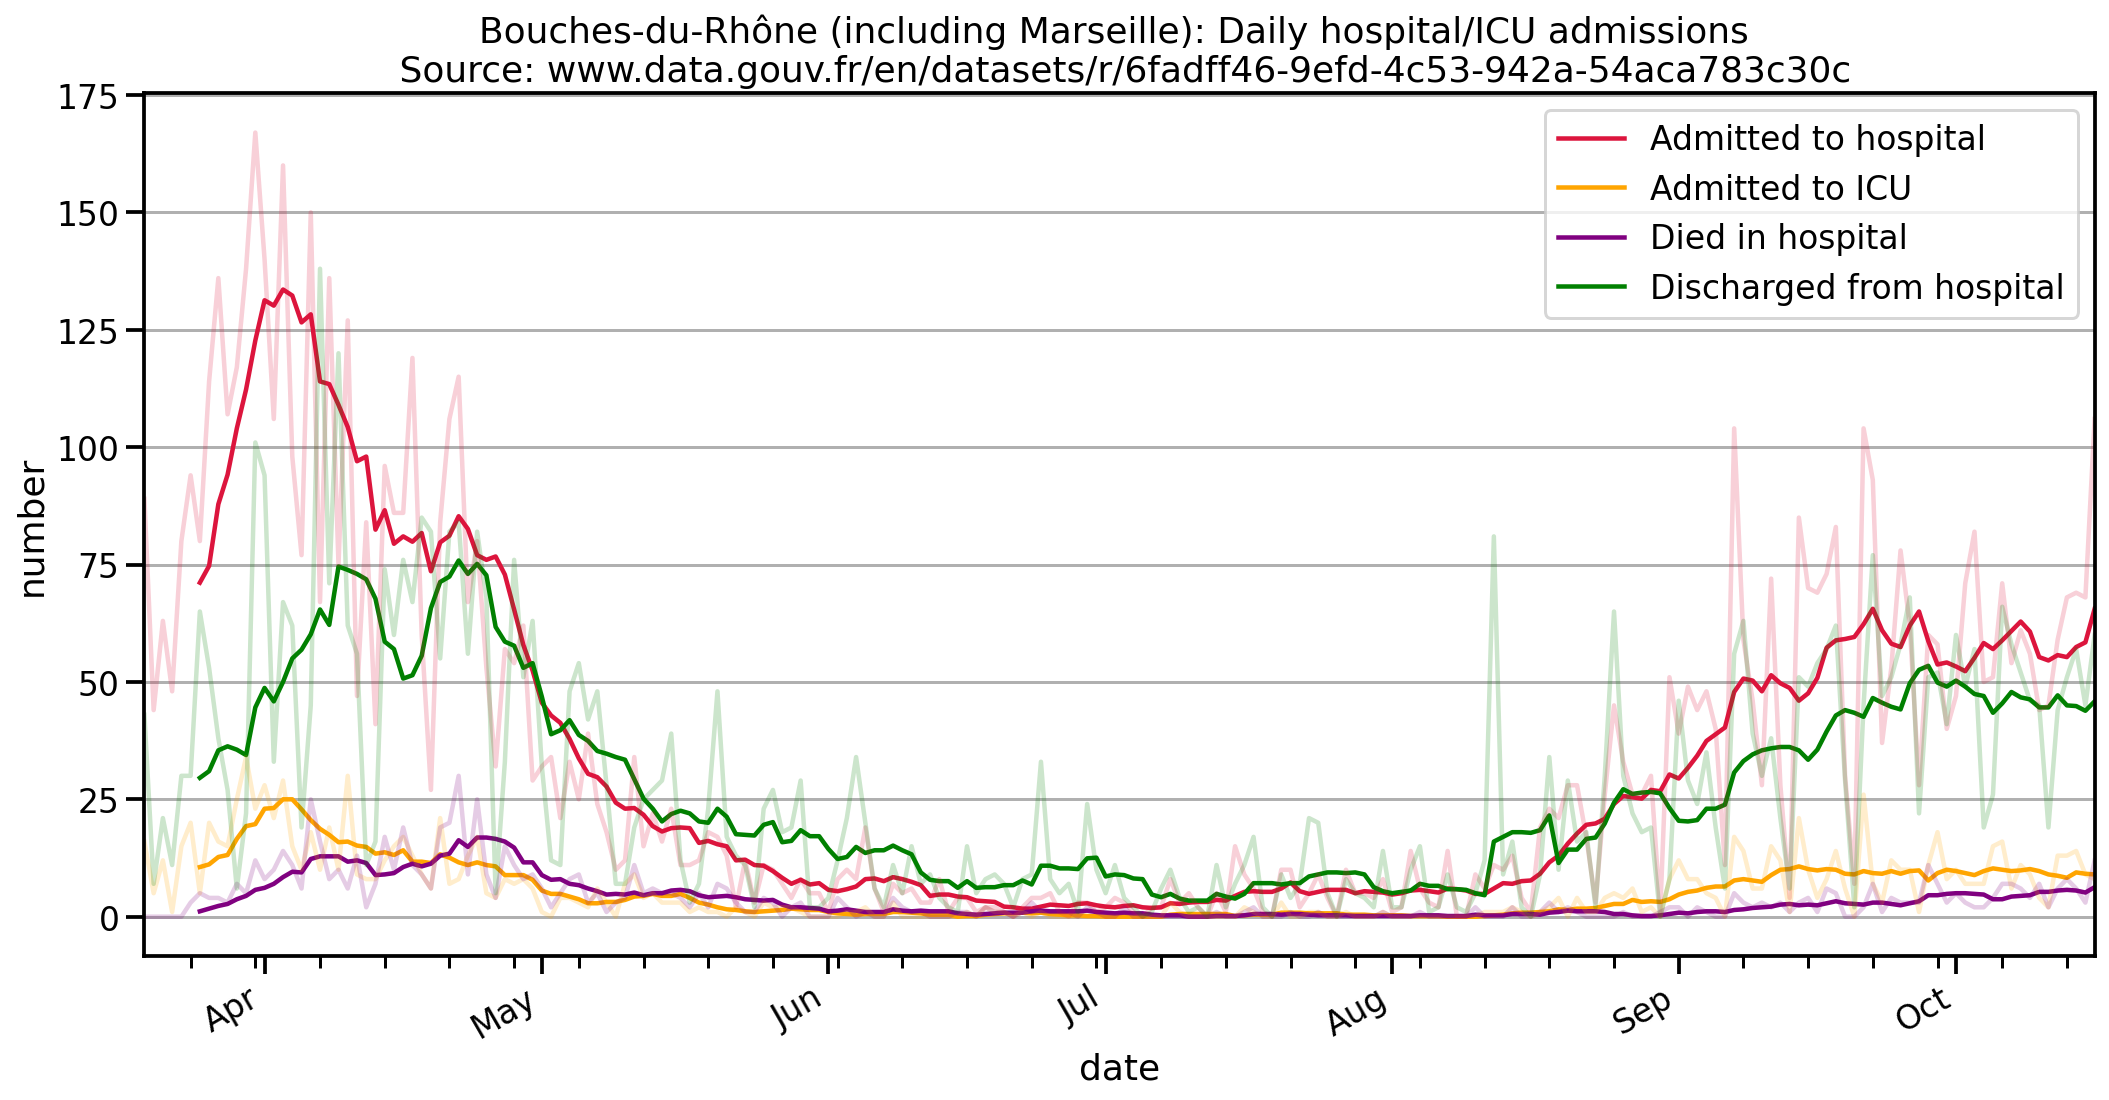

In [20]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(15, 8))

Marsdaily.plot(x='date',y='avg_incid_hosp',color='crimson',alpha=2,ax=ax,label='Admitted to hospital',legend=True)
Marsdaily.plot(x='date',y='avg_incid_rea',color='orange',alpha=2,ax=ax,label='Admitted to ICU',legend=True)
Marsdaily.plot(x='date',y='avg_incid_dc',color='purple',alpha=2,ax=ax,label='Died in hospital',legend=True)
Marsdaily.plot(x='date',y='avg_incid_rad',color='green',alpha=2,ax=ax,label='Discharged from hospital',legend=True)


Marsdaily.plot(x='date',y=['incid_hosp','incid_rea','incid_dc','incid_rad'],ax=ax,
       color=['crimson','orange','purple','green'],alpha=0.2,legend=False)
#,label=['Admitted to hospital','Admitted to ICU','Died','Released from hospital']

plt.ylabel('number')

# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()

plt.grid(axis='y')

plt.title("Bouches-du-Rhône (including Marseille): Daily hospital/ICU admissions \n Source: www.data.gouv.fr/en/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c")


fig.set_facecolor('w')

fig.autofmt_xdate()
#sns.despine;
plt.tight_layout()
plt.savefig('plots/MarseillesDaily.png',dpi=250)

In [21]:
from get_data.get_hospital_data import get_hosp_UK
    

In [22]:
UKcurrent,UKdaily=get_hosp_UK()

<AxesSubplot:xlabel='date'>

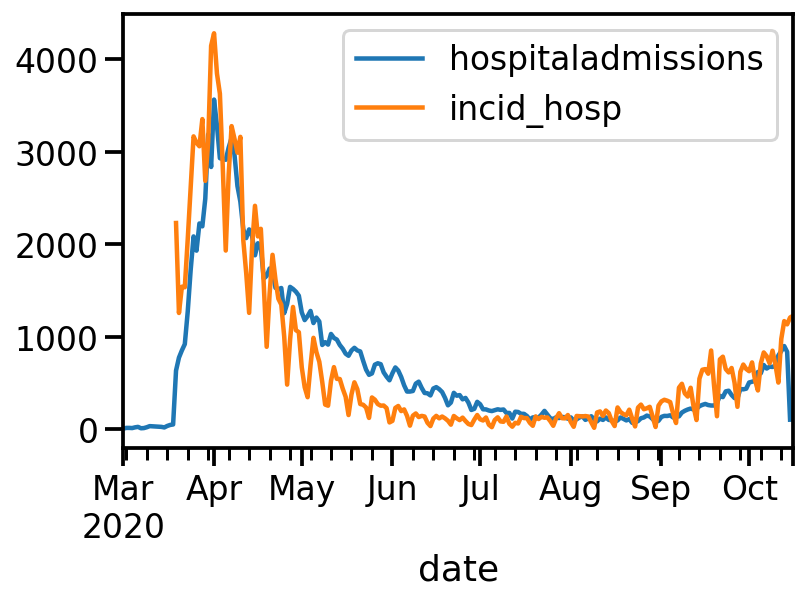

In [23]:
fig,ax=plt.subplots(1,1)
UKdaily.plot(x='date',y='hospitaladmissions',ax=ax)
daily.plot(x='date',y='incid_hosp',ax=ax)

In [24]:
current


,jour,sexe,hosp,rea,rad,dc,date
0,2020-03-18,0,2972,771,816,218,2020-03-18
1,2020-03-19,0,4073,1002,1180,327,2020-03-19
2,2020-03-20,0,5226,1297,1587,450,2020-03-20
3,2020-03-21,0,5900,1453,1811,525,2020-03-21
4,2020-03-22,0,6954,1674,2117,632,2020-03-22
...,...,...,...,...,...,...,...
207,2020-10-11,0,8231,1483,101460,21874,2020-10-11
208,2020-10-12,0,8671,1539,101868,21969,2020-10-12
209,2020-10-13,0,8928,1633,102649,22053,2020-10-13
210,2020-10-14,0,9173,1664,103382,22157,2020-10-14


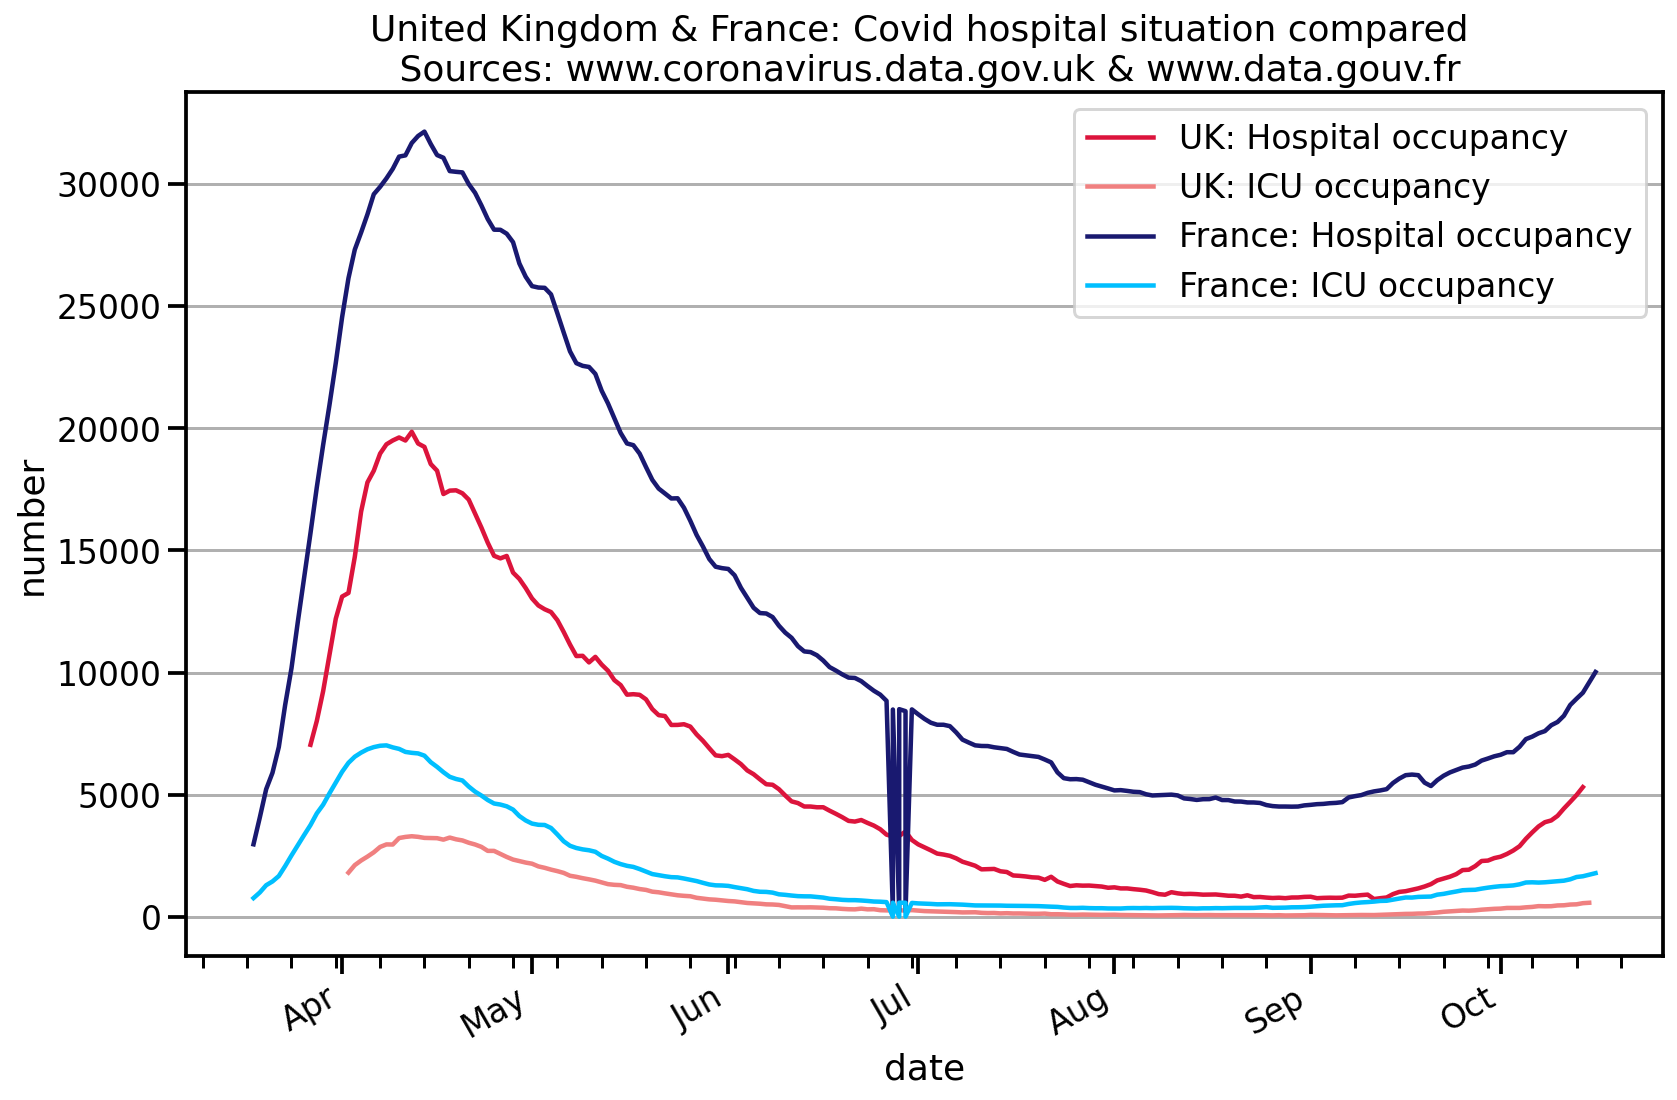

In [25]:
UKlastdate=UKcurrent.date.max()
UKlastdate=(UKlastdate.date().strftime('%d %b %Y'))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 8))

UKcurrent.plot(x='date',y=['hospitaloccupancy','icuoccupancy'],label=['UK: Hospital occupancy','UK: ICU occupancy'],ax=ax,color=['crimson','lightcoral'])
current.plot(x='date',y=['hosp','rea'],label=['France: Hospital occupancy', 'France: ICU occupancy'],ax=ax,color=['midnightblue','deepskyblue'])


# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('number')
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()


plt.grid(axis='y')
plt.legend()

plt.title('United Kingdom & France: Covid hospital situation compared \n Sources: www.coronavirus.data.gov.uk & www.data.gouv.fr')


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()
plt.savefig('plots/UK_FR_hospCurrent.png',dpi=250)

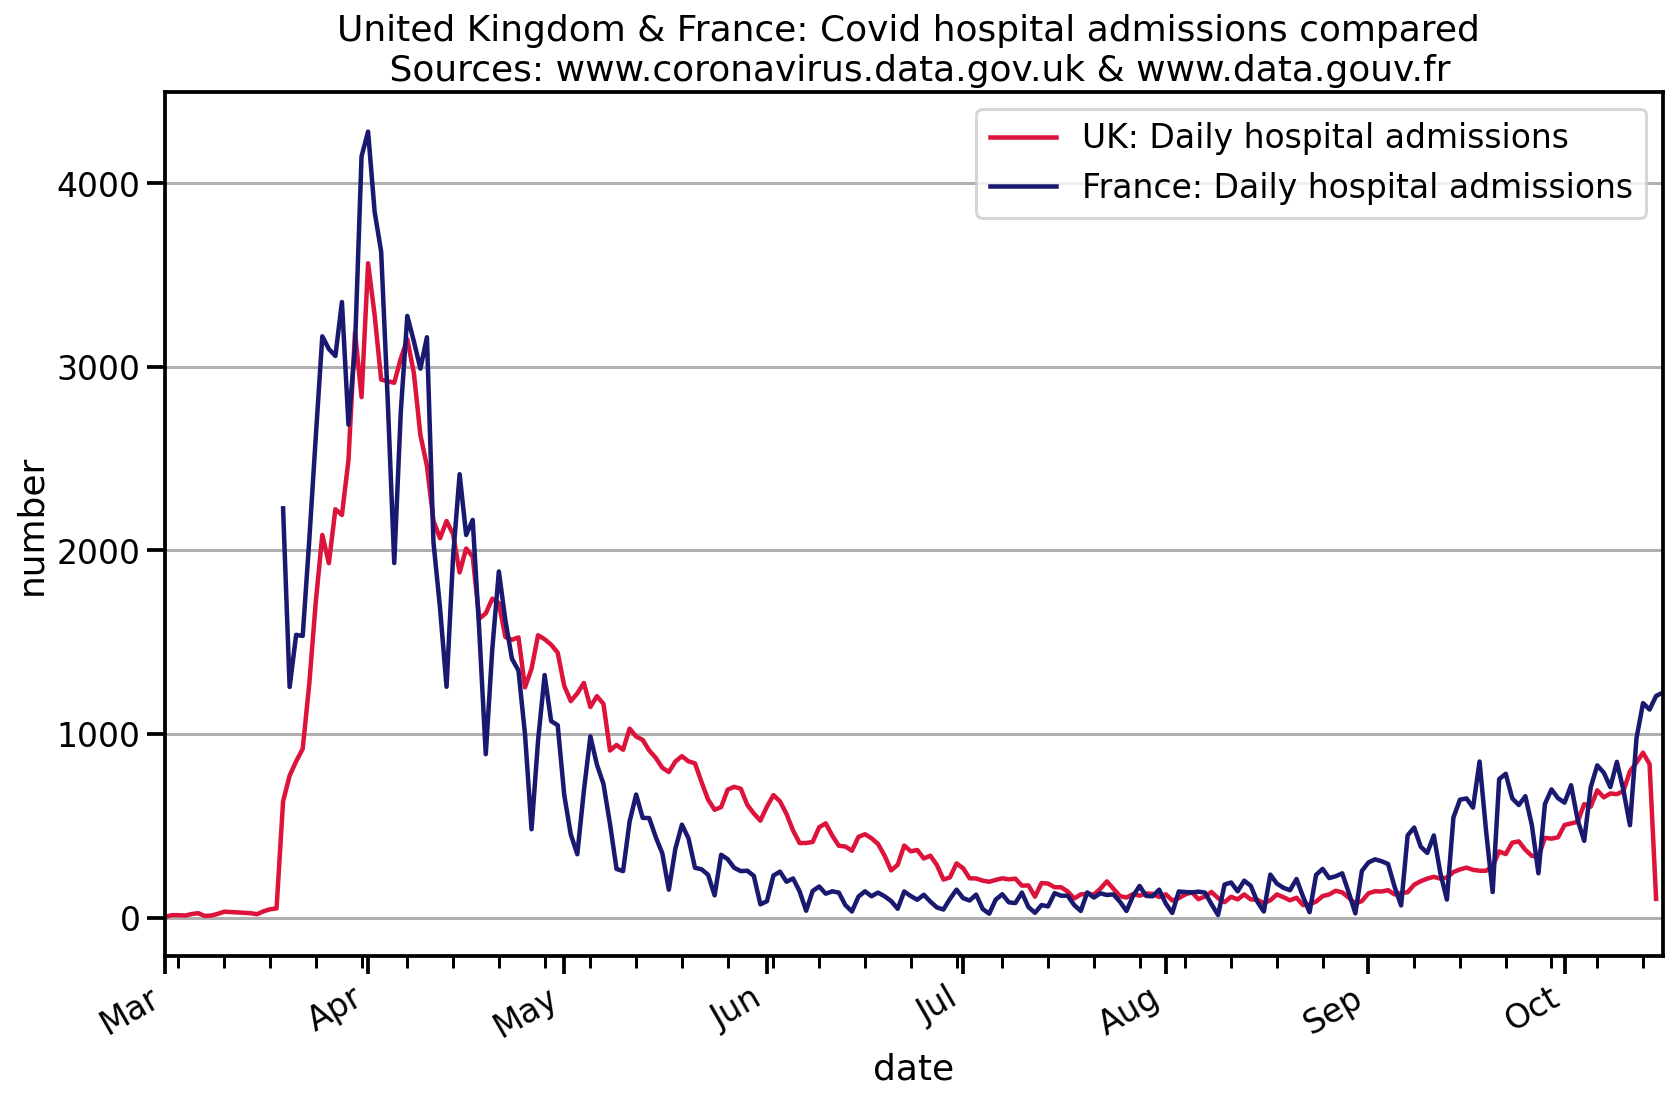

In [26]:


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 8))

UKdaily.plot(x='date',y=['hospitaladmissions'],label=['UK: Daily hospital admissions'],ax=ax,color=['crimson'])
daily.plot(x='date',y=['incid_hosp'],label=['France: Daily hospital admissions'],ax=ax,color=['midnightblue'])


# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('number')
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()


plt.grid(axis='y')
plt.legend()

plt.title('United Kingdom & France: Covid hospital admissions compared \n Sources: www.coronavirus.data.gov.uk & www.data.gouv.fr')


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()
plt.savefig('plots/UK_FR_hospDaily.png',dpi=250)

In [30]:
y0=UKdaily.loc[UKdaily.date==dt.datetime(2020,9,1)].hospitaladmissions.values
predictiondates=pd.date_range(start=dt.datetime(2020,9,1),end=UKdaily.date.max())
x=np.arange(len(predictiondates))
y=y0*2**(x/8)

prediction=pd.DataFrame({'x':predictiondates,'y':y})




y0=UKdaily.loc[UKdaily.date==dt.datetime(2020,9,18)].hospitaladmissions.values
predictiondates=pd.date_range(start=dt.datetime(2020,9,18),end=UKdaily.date.max())
x=np.arange(len(predictiondates))
y=y0*2**(x/8)

prediction2=pd.DataFrame({'x':predictiondates,'y':y})


y0=UKdaily.loc[UKdaily.date==dt.datetime(2020,9,30)].hospitaladmissions.values
predictiondates=pd.date_range(start=dt.datetime(2020,9,30),end=UKdaily.date.max())
x=np.arange(len(predictiondates))
y=y0*2**(x/8)

prediction3=pd.DataFrame({'x':predictiondates,'y':y})

UKdaily['avg']=UKdaily.hospitaladmissions.rolling(window=7,center=True).mean()

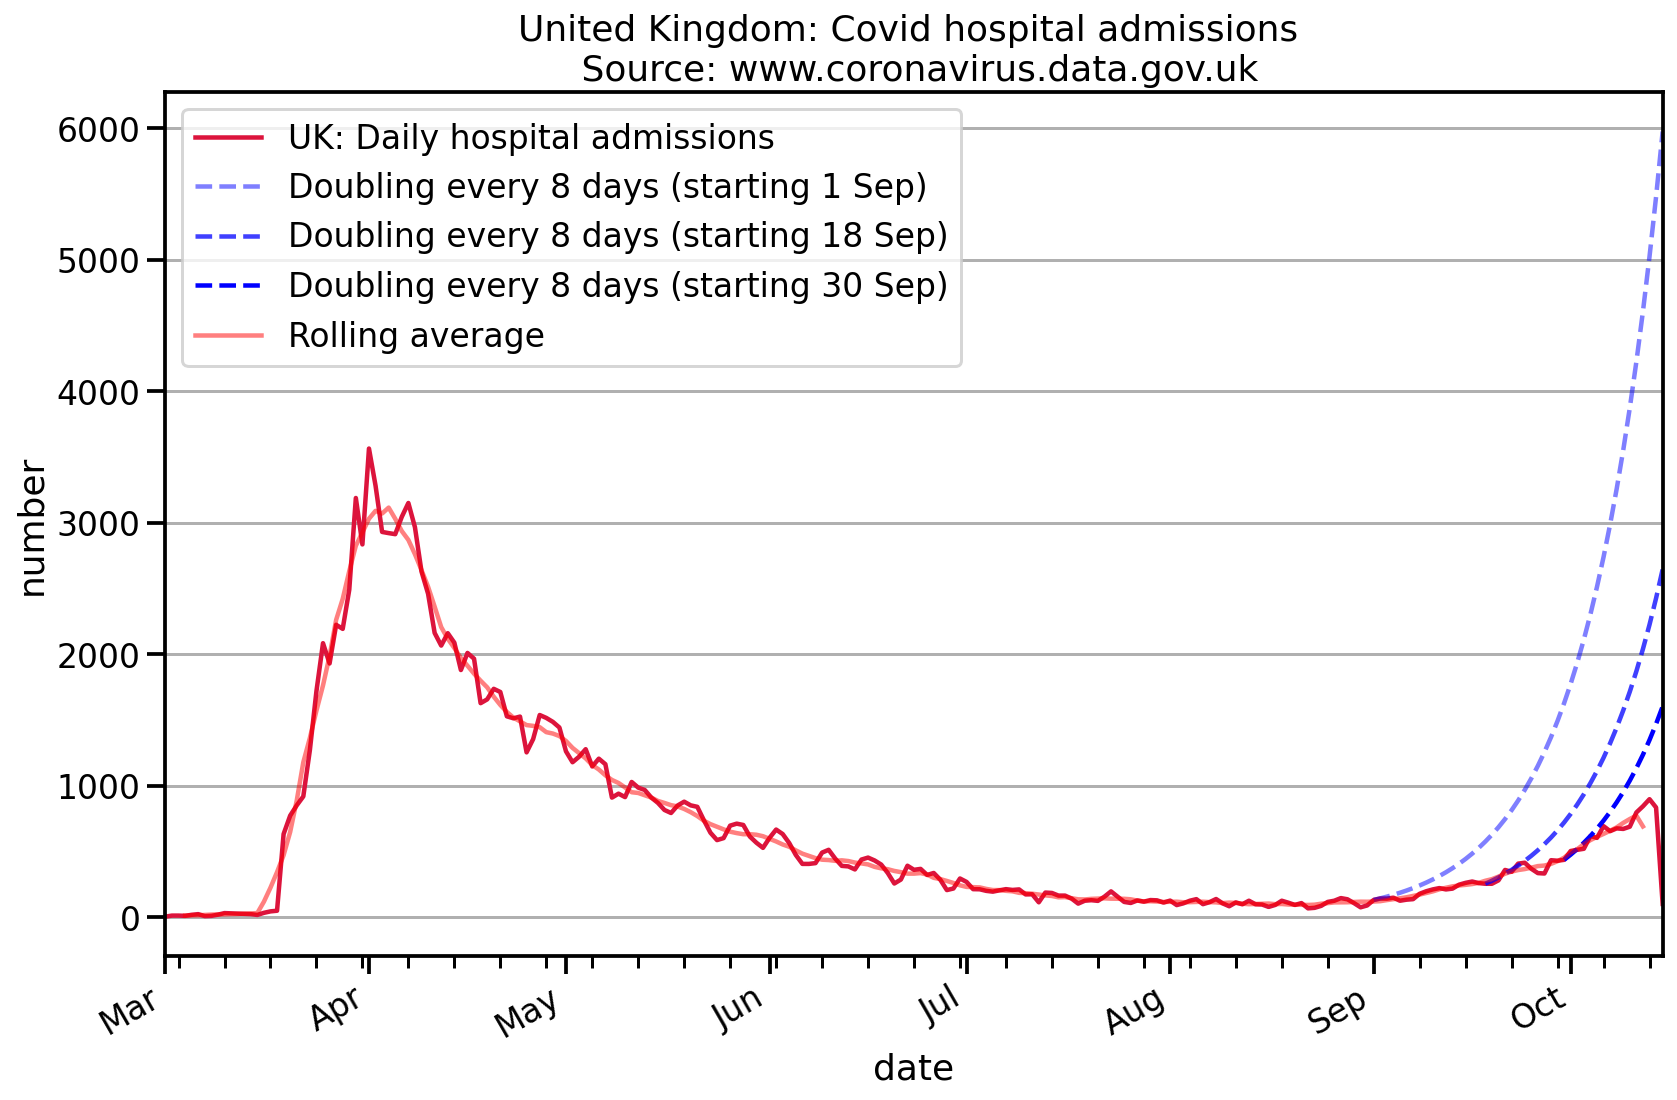

In [31]:


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12, 8))

UKdaily.plot(x='date',y=['hospitaladmissions'],label=['UK: Daily hospital admissions'],ax=ax,color=['crimson'])
#daily.plot(x='date',y=['incid_hosp'],label=['France: Daily hospital admissions'],ax=ax,color=['midnightblue'])
prediction.plot(x='x',y='y',label='Doubling every 8 days (starting 1 Sep)',ax=ax,color='blue',linestyle='--',alpha=0.5)
prediction2.plot(x='x',y='y',label='Doubling every 8 days (starting 18 Sep)',ax=ax,color='blue',linestyle='--',alpha=0.75)
prediction3.plot(x='x',y='y',label='Doubling every 8 days (starting 30 Sep)',ax=ax,color='blue',linestyle='--')
UKdaily.plot(x='date',y='avg',ax=ax,label='Rolling average',color='red',alpha=0.5)
# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('number')
plt.xlabel('date')
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()


plt.grid(axis='y')
plt.legend()

plt.title('United Kingdom: Covid hospital admissions \n Source: www.coronavirus.data.gov.uk')


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()
plt.savefig('plots/UK_hospDaily_prediction.png',dpi=250)